In [63]:
import matplotlib.pyplot as plt

from luna_quantum import algorithms, LunaSolve
from luna_quantum import Model as AqModel
from luna_quantum.solve.parameters.algorithms.base_params import (
    BasicQAOAParams,
    RandomQAOAParams,
    LinearQAOAParams,
    ScipyOptimizerParams,
)

from aqmodels import Solution, Model
from aqmodels.transformations import PassManager

# Classical optimization
from scipy.optimize import minimize

# Import model data
from model.data import ConventionCenter, Schedule, SessionChair
from model.visualization import (
    plot_floor_plan,
    solution_to_assignment,
)
from model.model import optimization_model

# Import utils (from last notebook)
from utils.sampling import cost_function, sample
from utils.qaoa import qaoa_circ_adv

%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

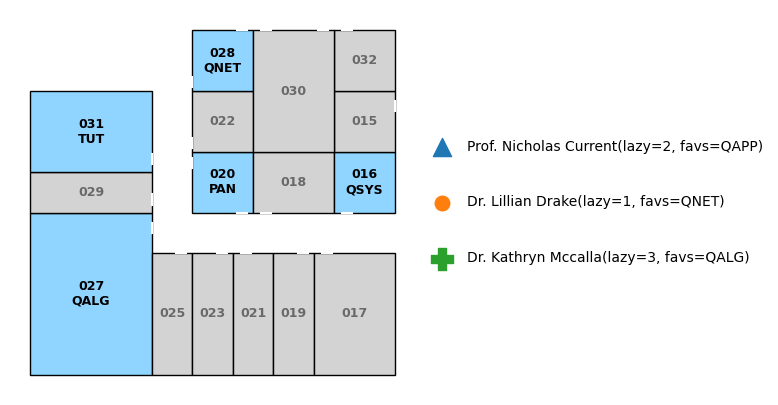

In [64]:
center = ConventionCenter.generate()
schedule = Schedule.random(5, center, seed=5)
chairs = SessionChair.random_chairs(3, seed=1)

satisfaction = 2

plot_floor_plan(center, schedule=schedule, chairs=chairs)

In [65]:
x, model = optimization_model(center, schedule, chairs, satisfaction=1)

In [66]:
try:
    LunaSolve()
except e:
    raise e
finally:
    print("Successfully connected to LunaSolve.")

Successfully connected to LunaSolve.


In [67]:
scip = algorithms.SCIP()
sol = scip.run(AqModel.decode(model.encode())).result()
sol = Solution.decode(sol.encode())

Output()

Output()

2025-07-14 10:13:10 INFO     {"model_id":"6874abdde1bc8903e03ac6df","solver_name":"SCIP","provider":"zib","paramete
                             rs":{},"name":null}

Output()

Output()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

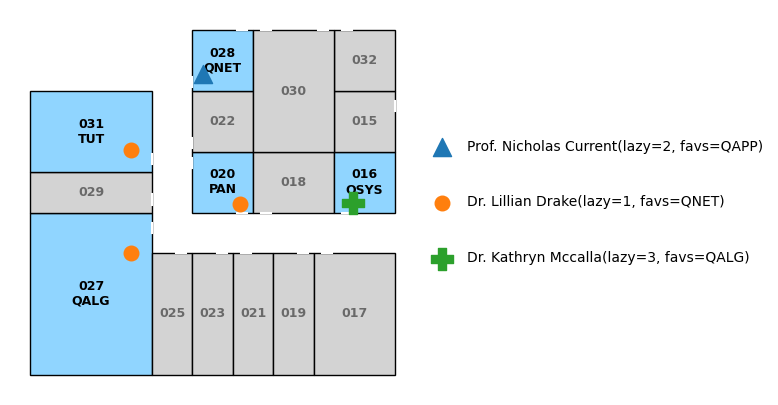

In [68]:
best = sol.best()
assignment = solution_to_assignment(x, best, chairs)
plot_floor_plan(center, schedule=schedule, chairs=chairs, assignment=assignment)

In [69]:
fqaoa = algorithms.FlexQAOA(reps=3)
sol = fqaoa.run(AqModel.decode(model.encode())).result()
sol = Solution.decode(sol.encode())

Output()

Output()

2025-07-14 10:13:14 INFO     {"model_id":"6874abdde1bc8903e03ac6df","solver_name":"FlexQAOA","provider":"aqarios","
                             parameters":{"shots":1024,"reps":3,"pipeline":{"indicator_function":{"penalty":null,"p
                             enalty_scaling":2},"one_hot":{},"quadratic_penalty":{"penalty":null}},"optimizer":{"me
                             thod":"cobyla","tol":null,"bounds":null,"jac":null,"hess":null,"maxiter":100,"options"
                             :{}},"qaoa_config":{"mixer":{"types":["even","odd","last"]},"parallel_indicators":true
                             ,"discard_slack":false,"infeas_penalty":null},"initial_params":{"delta_beta":0.5,"delt
                             a_gamma":0.5}},"name":null}

Output()

Output()

2025-07-14 10:13:17 INFO     Sleeping for 5.0 seconds. Waiting and checking a function in a loop.

Output()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

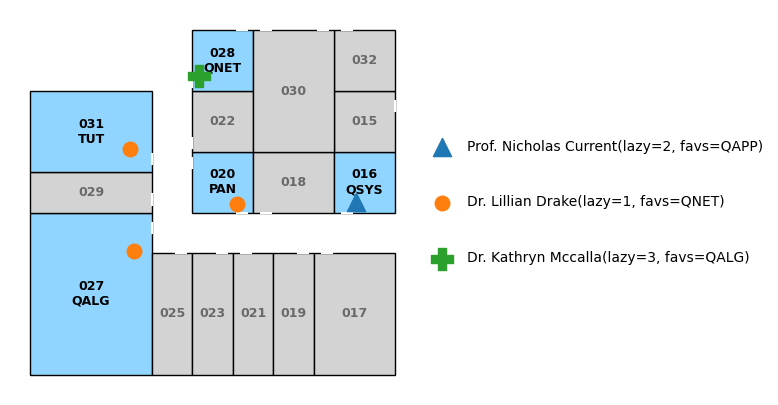

In [70]:
best = sol.best()
assignment = solution_to_assignment(x, best, chairs)
plot_floor_plan(center, schedule=schedule, chairs=chairs, assignment=assignment)

Output()

Output()

2025-07-14 10:13:25 INFO     {"model_id":"6874abdde1bc8903e03ac6df","solver_name":"FlexQAOA","provider":"aqarios","
                             parameters":{"shots":1024,"reps":3,"pipeline":{"indicator_function":{"penalty":null,"p
                             enalty_scaling":2},"one_hot":null,"quadratic_penalty":{"penalty":null}},"optimizer":{"
                             method":"cobyla","tol":null,"bounds":null,"jac":null,"hess":null,"maxiter":100,"option
                             s":{}},"qaoa_config":{"mixer":{"types":["even","odd","last"]},"parallel_indicators":tr
                             ue,"discard_slack":false,"infeas_penalty":null},"initial_params":{"delta_beta":0.5,"de
                             lta_gamma":0.5}},"name":null}

Output()

Output()

2025-07-14 10:13:27 INFO     Sleeping for 5.0 seconds. Waiting and checking a function in a loop.

Output()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

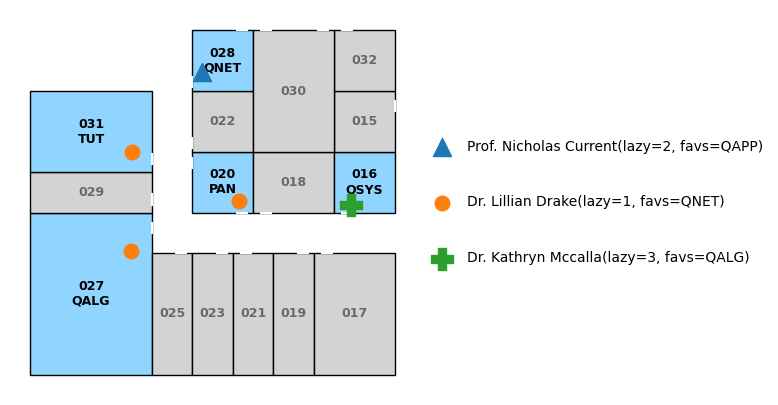

In [71]:
fqaoa = algorithms.FlexQAOA(reps=3)
fqaoa.pipeline.one_hot = None
sol = fqaoa.run(AqModel.decode(model.encode())).result()
sol = Solution.decode(sol.encode())

best = sol.best()
assignment = solution_to_assignment(x, best, chairs)
plot_floor_plan(center, schedule=schedule, chairs=chairs, assignment=assignment)

(array([235., 446., 160.,  91.,  65.,   5.,   7.,  10.,   0.,   5.]),
 array([ -1.  ,  10.61,  22.22,  33.83,  45.44,  57.05,  68.66,  80.27,
         91.88, 103.49, 115.1 ]),
 <BarContainer object of 10 artists>)

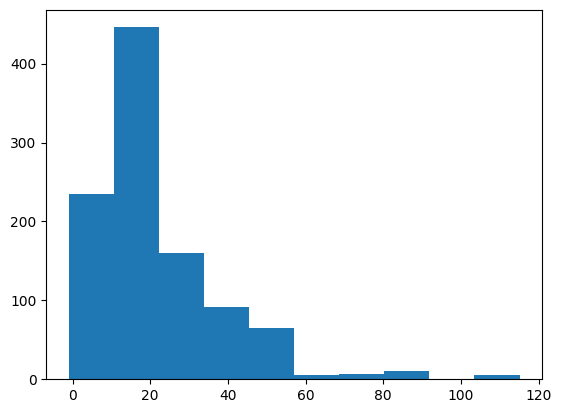

In [72]:
plt.hist(sol.obj_values, weights=sol.counts)

# We can go larger

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

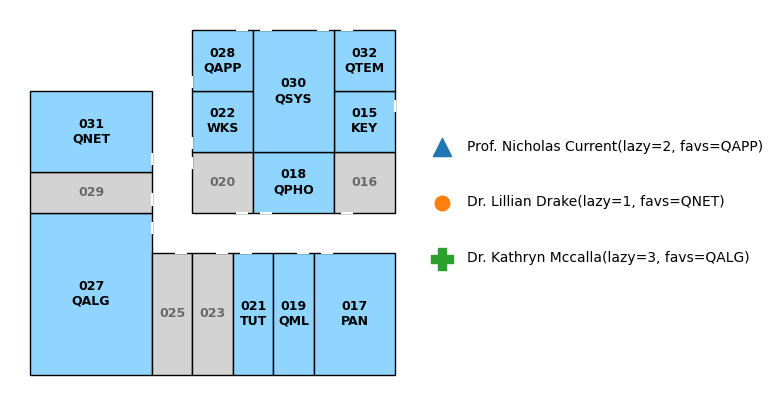

In [73]:
center = ConventionCenter.generate()
schedule = Schedule.random(11, center, seed=5)
chairs = SessionChair.random_chairs(3, seed=1)

satisfaction = 2

plot_floor_plan(center, schedule=schedule, chairs=chairs)

In [74]:
x, model = optimization_model(center, schedule, chairs, satisfaction=1)

Output()

Output()

2025-07-14 10:13:36 INFO     {"model_id":"6874b1b2daa5bfb4248939e3","solver_name":"FlexQAOA","provider":"aqarios","
                             parameters":{"shots":1024,"reps":3,"pipeline":{"indicator_function":{"penalty":null,"p
                             enalty_scaling":2},"one_hot":{},"quadratic_penalty":{"penalty":null}},"optimizer":{"me
                             thod":"cobyla","tol":null,"bounds":null,"jac":null,"hess":null,"maxiter":100,"options"
                             :{}},"qaoa_config":{"mixer":{"types":["even","odd","last"]},"parallel_indicators":true
                             ,"discard_slack":false,"infeas_penalty":null},"initial_params":{"delta_beta":0.5,"delt
                             a_gamma":0.5}},"name":null}

Output()

Output()

2025-07-14 10:13:38 INFO     Sleeping for 5.0 seconds. Waiting and checking a function in a loop.

Output()

2025-07-14 10:13:43 INFO     Sleeping for 10.0 seconds. Waiting and checking a function in a loop.

Output()

4


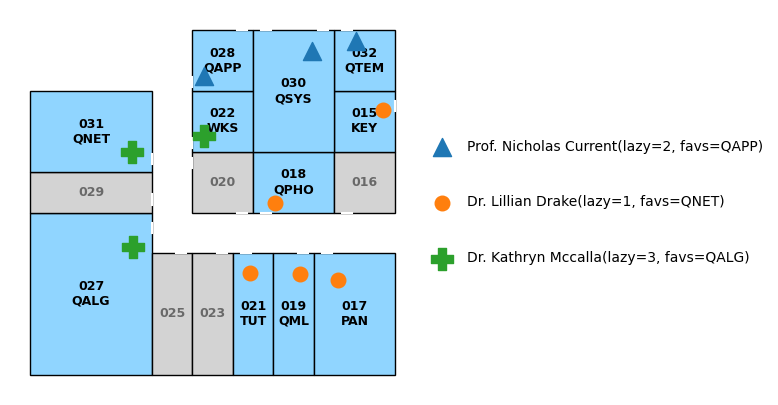

In [75]:
fqaoa = algorithms.FlexQAOA(reps=3)
# fqaoa.pipeline.one_hot = None
sol = fqaoa.run(AqModel.decode(model.encode())).result()
sol = Solution.decode(sol.encode())

best = sol.best()
assignment = solution_to_assignment(x, best, chairs)
plot_floor_plan(center, schedule=schedule, chairs=chairs, assignment=assignment)
print(sol.best().counts)

Output()

Output()

2025-07-14 10:13:56 INFO     {"model_id":"6874b1b2daa5bfb4248939e3","solver_name":"SCIP","provider":"zib","paramete
                             rs":{},"name":null}

Output()

Output()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

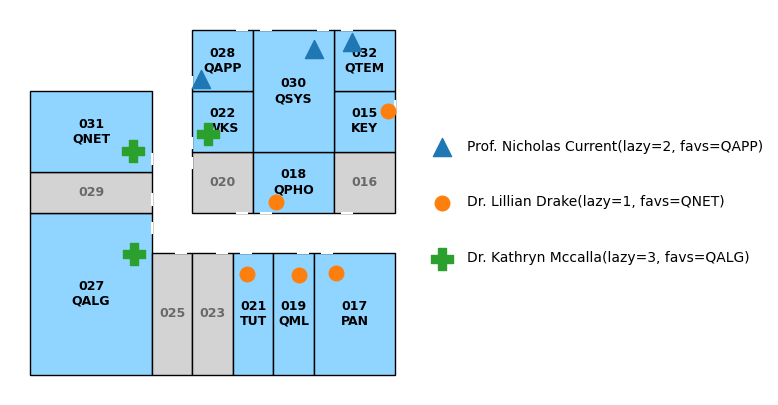

In [76]:
sol = scip.run(AqModel.decode(model.encode())).result()
sol = Solution.decode(sol.encode())

best = sol.best()
assignment = solution_to_assignment(x, best, chairs)
plot_floor_plan(center, schedule=schedule, chairs=chairs, assignment=assignment)

# Preparation for Bechmarking

In [80]:
class MyQAOA:
    """Wraps our QAOA implementation in Luna Quantum API."""

    def __init__(
        self,
        pass_manager: PassManager,
        reps: int = 1,
        shots: int = 1000,
        initial_params: LinearQAOAParams
        | BasicQAOAParams
        | RandomQAOAParams
        | None = None,
        optimizer: ScipyOptimizerParams | None = None,
    ):
        self.pass_manager = pass_manager
        self.reps = reps
        self.shots = shots
        self.params = initial_params or LinearQAOAParams(
            delta_beta=0.5, delta_gamma=0.5
        )
        self.optimizer = optimizer or ScipyOptimizerParams()

        self.qc = None

    def _get_initial(self):
        """Generates initial QAOA circuit params from input."""
        if isinstance(self.params, LinearQAOAParams):
            delta = 1 / self.reps
            betas = [
                self.params.delta_beta * (1 - delta / 2 - delta * i)
                for i in range(self.reps)
            ]
            gammas = [
                self.params.delta_gamma * (delta / 2 + delta * i)
                for i in range(self.reps)
            ]
            return betas + gammas
        elif isinstance(self.params, BasicQAOAParams):
            return self.params.betas + self.params.gammas
        else:
            random.seed(self.params.seed)
            betas = [random.uniform(*self.params.beta_range) for _ in range(self.reps)]
            gammas = [
                random.uniform(*self.params.gamma_range) for _ in range(self.reps)
            ]
            return betas + gammas

    def _optimizer_kwargs(self):
        """Generates a scipy minimize compliant kwargs dict from input."""
        kwargs = self.optimizer.model_dump(exclude_none=True)
        kwargs["options"]["maxiter"] = kwargs.pop("maxiter")
        return kwargs

    @property
    def circuit(self):
        if self.qc is None:
            raise RuntimeError("Make sure to run algorithm before accessing circuit")
        return self.qc

    def run(self, model: Model):
        """Runs the QAOA."""
        ir = self.pass_manager.run(model)
        qc = qaoa_circ_adv(ir, self.reps)
        self.qc = qc

        log = []

        x0 = self._get_initial()

        res = minimize(
            cost_function,
            args=(ir.model, qc, log, self.shots),
            x0=x0,
            **self._optimizer_kwargs(),
        )

        sol = sample(ir.model, qc, res.x, self.shots)
        res = self.pass_manager.backwards(sol, ir)

        class ResultWrapper:
            def result(self):
                return res

        return ResultWrapper()